# COURSE: Master Python for scientific programming by solving projects
## PROJECT: State-space trajectories via PCA
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [33]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Import and extract the data

Data are from http://crcns.org/data-sets/motor-cortex/alm-4/about-alm-4

In [34]:
# without mapping the google-drive
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
# import the data (via gdrive mapping or upload)
#matdat = loadmat('/content/gdrive/My Drive/Colab Notebooks/maspy/stateSpaceTrajectories/ALMdata.mat')
matdat = loadmat('ALMdata.mat')

Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
chanidx = matdat['Channel_all']

# examine sizes of the variables
print(Nopr.shape), print(' ')
print(Pref.shape), print(' ')
print(t.shape), print(' ')

print(chanidx.shape)
chanidx = chanidx.flatten() # going to need this to be an orientationless array
print(chanidx.shape)

# Inspect and clean the data

In [ ]:
# Let's have a look at the data

fig,ax = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(Nopr,extent=[t[0],t[-1],0,Nopr.shape[0]],origin='lower') # correct version
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial/channel')
ax[0].set_title('Non-preferred')

ax[1].imshow(Pref,extent=[t[0],t[-1],Nopr.shape[0],0]) # also correct
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial/channel')
ax[1].set_title('Preferred')

plt.show()

In [ ]:
plt.plot(t,Nopr.T)
plt.xlabel('Time (s)')
plt.ylabel('Activity')
plt.show()

plt.plot(t,Nopr[380,:])
plt.show()

Nopr[380,:]

In [ ]:
# an aside on the chanidx vector

plt.plot(chanidx,'s')
plt.show()

np.unique(chanidx) # also set()

In [ ]:
# remove NaN rows

print(Nopr.shape)
Nopr = Nopr[np.isfinite(Nopr[:,0]),:]
print(Nopr.shape)

chanidx = chanidx[np.isfinite(Pref[:,0])]

print(Pref.shape)
Pref = Pref[np.isfinite(Pref[:,0]),:]
print(Pref.shape)


In [ ]:
# Let's have a look at the data (again)

fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].imshow(Pref,extent=[t[0],t[-1],0,Pref.shape[0]],vmin=0,vmax=10,origin='lower') # correct version
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial')
ax[0].set_title('Preferred')

ax[1].imshow(Nopr,extent=[t[0],t[-1],Nopr.shape[0],0],vmin=0,vmax=10) # also correct
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial')
ax[1].set_title('Non-preferred')

plt.show()

In [ ]:
# plot the average time series

plt.plot(t,np.mean(Nopr,axis=0),label='Non-preferred',linewidth=2)
plt.plot(t,np.mean(Pref,axis=0),label='Preferred',linewidth=2)

plt.legend()
plt.xlim(t[[0,-1]])
plt.xlabel('Time (s)')
plt.ylabel('Activity (a.u.)')
plt.show()

# Create channel covariance matrix

In [ ]:
# need a channel x channel covariance matrix, so we need to average over trials per channel

# convenience
nchans = np.max(chanidx)

# initialize
chanaveNopr = np.zeros((nchans,len(t)))
chanavePref = np.zeros((nchans,len(t)))


print(Nopr.ndim,type(Nopr))
print(chanaveNopr.ndim,type(chanaveNopr))
print(chanidx.ndim,type(chanidx))
for i in range(1,nchans+1): # get error b/c chanidx starts at 1
  chanaveNopr[i-1,:] = np.mean(Nopr[chanidx==i,:],axis=0)
  chanavePref[i-1,:] = np.mean(Pref[chanidx==i,:],axis=0)

print(chanaveNopr.shape)

chanaveNopr[0,0]



In [ ]:
# Let's have a look at the data (again)

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(chanaveNopr,extent=[t[0],t[-1],0,nchans],vmin=0,vmax=10,origin='lower') # correct version
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Channel')
ax[0].set_title('Non-preferred (channel average)')

ax[1].imshow(chanavePref,extent=[t[0],t[-1],nchans,0],vmin=0,vmax=10,origin='upper') # also correct
ax[1].set_aspect(1/ax[1].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Channel')
ax[1].set_title('Preferred (channel average)')

plt.show()

In [ ]:
# now create covariance matrix

# each covariance matrix
covmatPref = np.cov(chanavePref)
covmatNopr = np.cov(chanaveNopr)

# compute covariance matrix
covmat = (covmatPref + covmatNopr) / 2

# show it!
plt.imshow(covmat,vmin=-2,vmax=2)
plt.xlabel('Channels')


# Compute the PCA

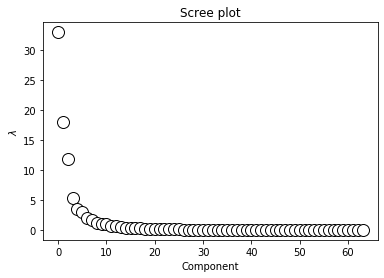

33.00131408068438 -0.14097781355385622 1.5912060586527488 1.5476232045563545


In [35]:
# eigendecomposition
evals,evecs = np.linalg.eigh(covmat)

# sort the solutions
sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

plt.plot(evals,'ko',markerfacecolor='w',markersize=12)
plt.xlabel('Component')
plt.ylabel('$\lambda$')
plt.title('Scree plot')
plt.show()
print(evals[0],evecs[0,0],chanaveNopr[0,0],chanavePref[0,0])

0.14097781355385622


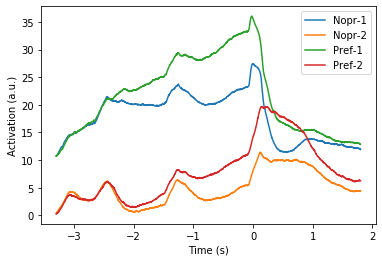

In [27]:
# compute the PCs

# flip eigenvector sign according to max value
for i in range(nchans):
  # find maximum component value
  maxi = np.argmax(abs(evecs[:,i]))
  evecs[:,i] *= np.sign(evecs[maxi,i])

print(evecs[0,0])
# compute PCs
pcNopr = evecs[:,0:2].T @ chanaveNopr
pcPref = evecs[:,0:2].T @ chanavePref

# plot as time series
plt.plot(t,pcNopr.T, t,pcPref.T)
plt.xlabel('Time (s)')
plt.ylabel('Activation (a.u.)')
plt.legend(['Nopr-1','Nopr-2','Pref-1','Pref-2'])
plt.show()


# Create the state-space trajectory

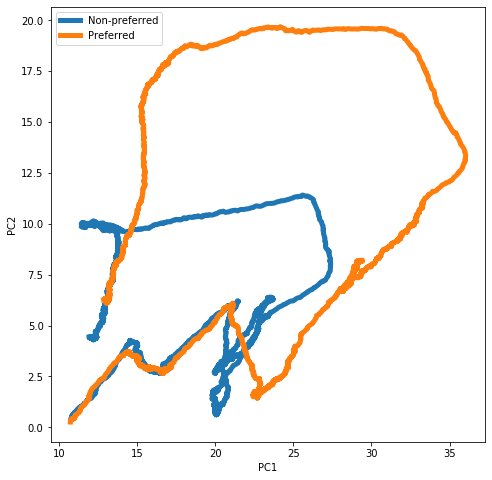

In [15]:
# state-space diagram

fig = plt.subplots(1,figsize=(8,8))

plt.plot(pcNopr[0,:],pcNopr[1,:],label='Non-preferred',linewidth=5)
plt.plot(pcPref[0,:],pcPref[1,:],label='Preferred',linewidth=5)

plt.legend()
plt.gca().set_aspect(1./plt.gca().get_data_ratio())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Bonus: Draw time as hue

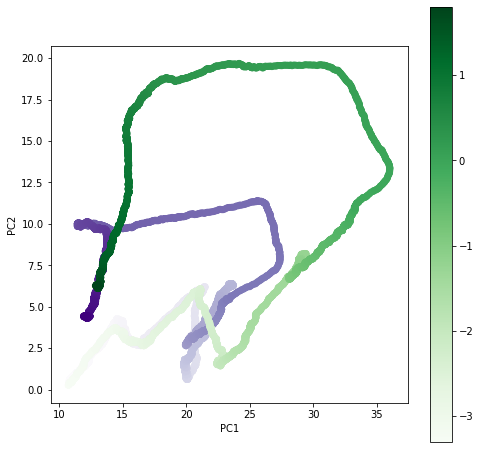

In [16]:
# using matplotlib
fig = plt.subplots(1,figsize=(8,8))

plt.scatter(pcNopr[0,:],pcNopr[1,:],c=t,cmap='Purples')
h = plt.scatter(pcPref[0,:],pcPref[1,:],c=t,cmap='Greens')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(h)
plt.gca().set_aspect(1./plt.gca().get_data_ratio())
plt.show()

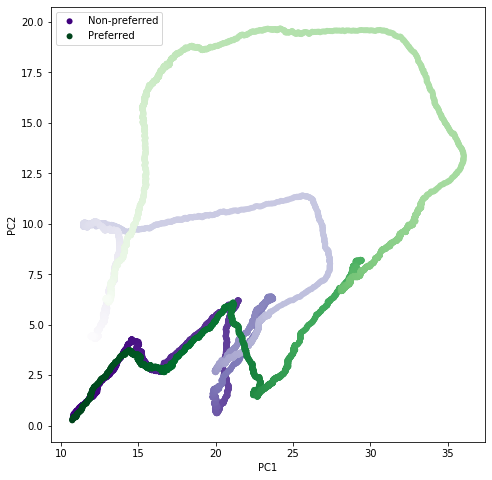

In [17]:
# using seaborn
# (Note: in this solution I've flipped the color-mapping backwards
#  by flipping time backwards. It would make the colorbar inaccurate, though.)

import seaborn as sns

fig = plt.subplots(1,figsize=(8,8))

sns.scatterplot(pcNopr[0,:],pcNopr[1,:],hue=t[::-1],label='Non-preferred',
                legend=False,palette='Purples',linewidth=0)
sns.scatterplot(pcPref[0,:],pcPref[1,:],hue=t[::-1],label='Preferred',
                legend=False,palette='Greens',edgecolor='none')

plt.legend()
plt.gca().set_aspect(1./plt.gca().get_data_ratio())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()